In [57]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase
using CSV
using DataFrames

In [58]:
t_start = time();

## Parameters:

In [59]:
t0 = 1.0;
t = 1.0;
m_0 = 0.0;
mu = 0.0;
Delta = 2.5;

x_periodic = 1;
y_periodic = 1;

L = 60;
l1 = 15;
l2 = 30;
m_lattice = 30;

Lx = L;
Ly = L;

exportdata=1;

Equation of two lines are $y = mx + c_1$ and $y = mx + c_2$

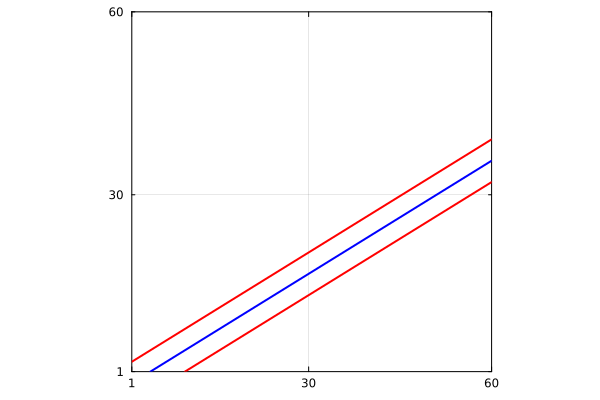

In [60]:
m = (-1+sqrt(5))/2

c1 = -5
c2 = 2

# m=2/3;
# c1 = -7
# c2 = 0

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

function line_middle(x::Float64)
    return (line_up(x) + line_down(x))/2
end

line_x = [1.0,L+1]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plot(line_x,line_down_y,color="red",width=2, xlims=(1,Lx),ylims=(1,Ly),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plot!(line_x,line_up_y,color="red",width=2)
plot!(line_x,line_middle.(line_x),color="blue",width=2)

In [61]:
points_x_array_dummy = range(1, Lx+1,Lx+1)
points_y_array_dummy = range(1, Ly,Ly)

n_atoms = Lx*Ly + l2;
points2 = zeros(2*n_atoms);

for ii = 1:m_lattice
    for jj = 1:l1
        points2[2*((jj-1)*Lx+ii)-1] = points_x_array_dummy[ii]
        points2[2*((jj-1)*Lx+ii)] = points_y_array_dummy[jj]
    end
end

for ii = m_lattice+2:Lx+1
    for jj = 1:l1
        points2[2*((jj-1)*Lx+ii-1)-1] = points_x_array_dummy[ii]
        points2[2*((jj-1)*Lx+ii-1)] = points_y_array_dummy[jj]
    end
end

for ii = 1:Lx+1
    for jj = 1:l2
        points2[2*(Lx*l1+(jj-1)*(Lx+1)+ii)-1] = points_x_array_dummy[ii]
        points2[2*(Lx*l1+(jj-1)*(Lx+1)+ii)] = points_y_array_dummy[jj+l1]
    end
end

for ii = 1:m_lattice
    for jj = 1:Ly-l1-l2
        points2[2*((Lx*(l1+l2)+l2)+(jj-1)*Lx+ii)-1] = points_x_array_dummy[ii]
        points2[2*((Lx*(l1+l2)+l2)+(jj-1)*Lx+ii)] = points_y_array_dummy[jj+l1+l2]
    end
end

for ii = m_lattice+2:Lx+1
    for jj = 1:Ly-l1-l2
        points2[2*((Lx*(l1+l2)+l2)+(jj-1)*Lx+ii-1)-1] = points_x_array_dummy[ii]
        points2[2*((Lx*(l1+l2)+l2)+(jj-1)*Lx+ii-1)] = points_y_array_dummy[jj+l1+l2]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end];
points_y_array =  points2[2:2:end];


In [62]:
println(points_x_array)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 

In [63]:
println(points_y_array)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,

### Now we isolate the PTB points

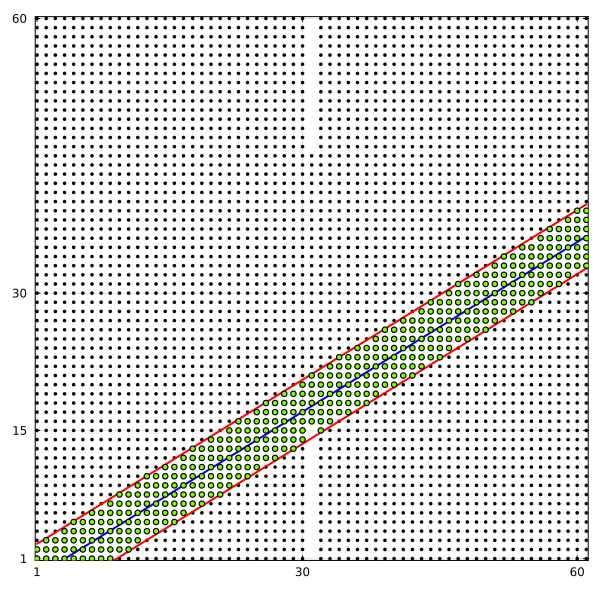

In [64]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,n_atoms,n_atoms))
for ii = 1:n_atoms
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,Lx+1]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, 
                    xlims=[0.8,Lx+1.2], ylims=[0.8,Lx+0.2],color="black",markersize=2, frame=:box, framestyle=:thick, xticks=[1,Lx/2,Lx],yticks=[1,Ly/4,Ly/2,Ly], size=(600,600))
plt_lattice=plot!(line_x,line_down_y,color="red",width=2)
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=plot!(line_x,line_middle.(line_x),color="blue",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="lawngreen",aspect_ratio=1,legend=false,markersize=3)

In [65]:
points_PTB_array_x

404-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
  1.0
  ⋮
 58.0
 59.0
 60.0
 61.0
 59.0
 60.0
 61.0
 60.0
 61.0

## Percentage of sites in PTB

In [66]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/L^2, " %")

Number of sites in PTB = 404
Amount of sites in PTB = 11.222222222222221 %


In [67]:
println(PTB_index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1111, 1112, 1113

## Coordinates of projected sites

### Equation of line_down is $y=mx + c_1$
### Equation of projector line is, $y-y_1 = (-1/m).(x-x_1)$, where $(x_1,y_1)$ is the coordinate of the site
### The two lines intersect at $((m.y_1 + x_1 - m.c_1)/(m^2 + 1), (m^2.y_1 + m.x_1 + c_1)/(m^2 + 1))$

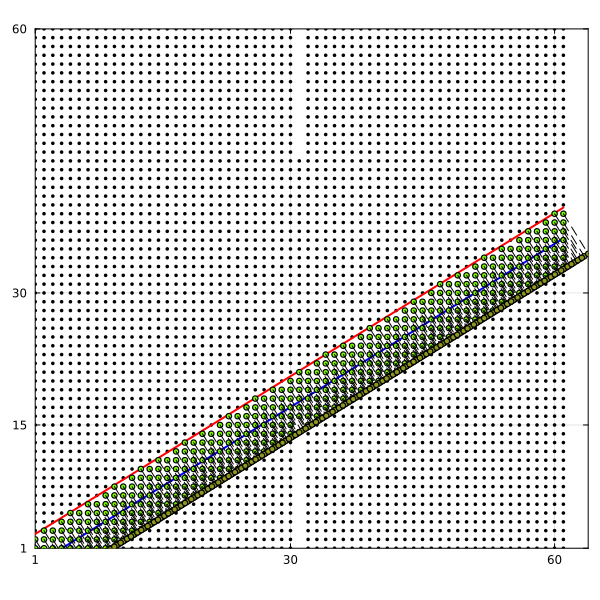

In [68]:
projected_points_PTB_array_x = (m*points_PTB_array_y + points_PTB_array_x - m*ones(N_PTB)*c1)/(m^2 + 1);
projected_points_PTB_array_y = m*projected_points_PTB_array_x + c1 * ones(N_PTB);

## This array contains distance along the line
## This should be x coordinates on the line * sec(theta), where the slope is tan(theta) = m
distance_along_projected_line = projected_points_PTB_array_x * sqrt(m^2 +1)

for ii = 1:N_PTB
    line_projected_x = [points_PTB_array_x[ii],projected_points_PTB_array_x[ii]]
    line_projected_y = [points_PTB_array_y[ii],projected_points_PTB_array_y[ii]]
    plt_lattice=plot!(line_projected_x,line_projected_y,linestyle=:dash, color="black")
end
plt_lattice=scatter!(projected_points_PTB_array_x,projected_points_PTB_array_y, 
            xlims=(1,maximum(vcat(projected_points_PTB_array_x,Lx))), ylims=(1,maximum(vcat(projected_points_PTB_array_y,Ly))), markersize=3)
display(plt_lattice)

## Generate Parent Hamiltonian

In [69]:
include("generate_matrices_dislocation2D.jl")
include("angmom.jl")

generate_spin_matrices (generic function with 1 method)

In [70]:
println("t = ",t)
println("m_0 = ", m_0)
println("Delta = ",Delta)
println("mu = ", mu)
println("Lx = ", Lx)
println("Ly = ", Ly)

t = 1.0
m_0 = 0.0
Delta = 2.5
mu = 0.0
Lx = 60
Ly = 60


In [71]:
if(x_periodic^2 != x_periodic || y_periodic^2 != y_periodic)
    println("x_periodic and y_periodic must be 0 or 1")
    println("You entered x_periodic = ", x_periodic, " y_periodic = ", y_periodic)
    return
end

In [72]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_13 = kron(sigma_x,sigma_z);
gamma_30 = kron(sigma_z, eye2);
gamma_31 = kron(sigma_z, sigma_x);
gamma_32 = kron(sigma_z, sigma_y);
gamma_33 = kron(sigma_z, sigma_z);

In [ ]:

const_2D, CX2D, SX2D, CY2D, SY2D = generate_matrices_double_dislocation2D(Lx, Ly, l1,l2,m_lattice,x_periodic, y_periodic)

h_SC_chern = t*kron(SX2D,gamma_01) + t*kron(SY2D,gamma_02) + kron(m_0*const_2D- t0*(CX2D + CY2D),gamma_03) + Delta*kron(const_2D,gamma_13) -mu*kron(const_2D,gamma_30)

if(Hermitian_Check(h_SC_chern) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

Verified: Building Block Matrices are Hermitian


## Clear Variables

In [83]:
const_2D= Nothing
CX2D= Nothing
SX2D= Nothing
CY2D= Nothing
SY2D= Nothing
CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Nothing

## Now generate PTB Hamiltonian

In [84]:
PTB_orbital_index = ones(4*N_PTB);
for ii = 1:N_PTB
    PTB_orbital_index[4*ii-3] = 4*PTB_index[ii]-3
    PTB_orbital_index[4*ii-2] = 4*PTB_index[ii]-2
    PTB_orbital_index[4*ii-1] = 4*PTB_index[ii]-1
    PTB_orbital_index[4*ii] = 4*PTB_index[ii]
end
println(PTB_orbital_index)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 253.0, 254.0, 255.0, 256.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 485.0, 486.0, 487.0, 488.0, 489.0, 490.0, 491.0, 492.0, 493.0, 494.0, 495.0, 496.0, 497.0, 498.0, 499.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 507.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 733.0, 734.0, 735.0, 736.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 750.0, 751.0, 752.0, 753.0, 754.0, 755.0, 756.0, 757.0, 7

In [85]:
outside_orbital_index = setdiff(1:4*n_atoms,PTB_orbital_index);
println(outside_orbital_index)

[37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0

In [86]:
NOrbitalsOutside = 4*n_atoms - 4*N_PTB

12904

In [87]:
NOrbitalsInside = 4*N_PTB

1616

In [88]:
H_PTB_renor = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_11 = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_22 = zeros(NOrbitalsOutside,NOrbitalsOutside)*im;

H_21 = zeros(NOrbitalsOutside,NOrbitalsInside)*im;

H_12 = zeros(NOrbitalsInside,NOrbitalsOutside)*im;

In [89]:
for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsInside
        H_11[ii,jj] = h_SC_chern[Int(PTB_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

In [90]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsOutside
        H_22[ii,jj] = h_SC_chern[Int(outside_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [91]:
Threads.@threads for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsOutside
        H_12[ii,jj] = h_SC_chern[Int(PTB_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [92]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsInside
        H_21[ii,jj] = h_SC_chern[Int(outside_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

## Clear variables

In [93]:
h_SC_chern= Nothing

Nothing

## Add a small constant matrix to invert matrix H_22 in case its eigenvalue is 0

In [94]:
H_PTB_renor = H_11 - Hermitian(H_12*inv(Hermitian(H_22 + 10^(-8)*Matrix(1.0I, NOrbitalsOutside, NOrbitalsOutside)))*H_21);

In [95]:
H_11= Nothing
H_12= Nothing
H_21= Nothing
H_22= Nothing

Nothing

In [96]:
(energy_eigenvalues_PTB, eigenstates_PTB) = eigen(H_PTB_renor);

In [97]:
if(Hermitian_Check(H_PTB_renor) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

In [98]:
println("size H_PTB_renor = ", size(H_PTB_renor))
println("size eigenstates = ", size(eigenstates_PTB))

size H_PTB_renor = (1616, 1616)
size eigenstates = (1616, 1616)


In [99]:
Gap_PTB = 2*minimum(abs.(energy_eigenvalues_PTB))

1.365737601075062

In [100]:
energy_eigenvalues_PTB[Int(round(NOrbitalsInside/2))],energy_eigenvalues_PTB[Int(round(NOrbitalsInside/2)-1)]

(-0.682868800537531, -0.6839077854828478)

In [101]:
N_PTB, NOrbitalsInside

(404, 1616)

## Filename

In [102]:
# Define the folder path (relative or absolute)
folder_path = "data/topo_super/dislocation/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)


filename = "t0=$(t0)_t=$(t)_m_0=$(m_0)_mu=$(mu)_Delta=$(Delta)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(L)_l1=$(l1)_l2=$(l2)_mlattice=$(m_lattice)_m=$(m)_c1=$(c1)_c2=$(c2).csv"

"t0=1.0_t=1.0_m_0=0.0_mu=0.0_Delta=2.5_x_periodic=1_y_periodic=1_L=60_l1=15_l2=30_mlattice=30_m=0.6180339887498949_c1=-5_c2=2.csv"

## Bulk boundary correspondence

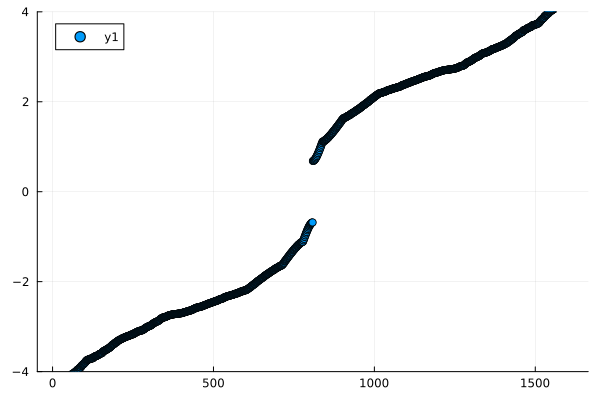

In [103]:
plt2 = scatter(1:NOrbitalsInside, energy_eigenvalues_PTB, ylims=(-4,4))
display(plt2)

In [104]:
energy_eigenvalues_PTB[2*N_PTB-1]

-0.6839077854828478

In [105]:
energy_eigenvalues_PTB[2*N_PTB]

-0.682868800537531

In [106]:
energy_eigenvalues_PTB[2*N_PTB+1]

0.6828688032649897

In [107]:
isdir(string(folder_path,"energies/")) || mkdir(string(folder_path,"energies/"))

if exportdata==1
    CSV.write(string(folder_path,"energies/",filename), (; energy_eigenvalues_PTB),writeheader=false)
end

"data/topo_super/dislocation/energies/t0=1.0_t=1.0_m_0=0.0_mu=0.0_Delta=2.5_x_periodic=1_y_periodic=1_L=60_l1=15_l2=30_mlattice=30_m=0.6180339887498949_c1=-5_c2=2.csv"

In [108]:
function state_to_real_space_LDoS(v::Array{ComplexF64})
    n_sites = Int(size(v)[1]/4)
    prob_dist = zeros(n_sites)
    for ii = 1:n_sites
        prob_dist[ii] = abs(v[4*ii-3])^2 +  abs(v[4*ii-2])^2 + abs(v[4*ii-1])^2 + abs(v[4*ii])^2
    end
    return prob_dist
end 

state_to_real_space_LDoS (generic function with 1 method)

## Plot of LDoS of topological states of PTB

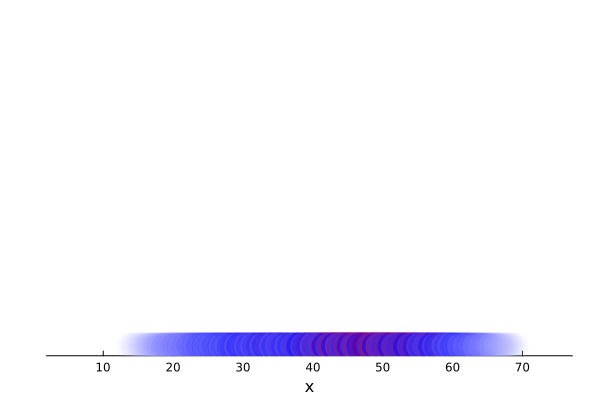

In [109]:
#boundary_state_nearest_zero = eigenstates_PTB[:,N_PTB];
probability_boundary_state = state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB]);
color_map = cgrad([RGB(1,1,1), RGB(0,0,1), RGB(1,0,0)])

# Calculate alphas based on y values
function alpha_function(p, pmax)
    if p < pmax/10
        return 0
    else
        return p/pmax
    end
end
alphas = alpha_function.(probability_boundary_state, maximum(probability_boundary_state))

#plt_PTB_BD_states = scatter(distance_along_projected_line, probability_boundary_state)
plt_PTB_BD_states = scatter(distance_along_projected_line, ones(N_PTB), 
                            zcolor=probability_boundary_state, legend=false, xlabel="x", colorbar_title="Value",
                            c=color_map, ms=15, seriesalpha=alphas, markerstrokewidth=0, grid=false,
                            yaxis=false)

display(plt_PTB_BD_states)

In [110]:
isdir(string(folder_path,"LDOS/")) || mkdir(string(folder_path,"LDOS/"))

if exportdata==1
    CSV.write(string(folder_path,"LDOS/",filename), (; probability_boundary_state),writeheader=false)
end

"data/topo_super/dislocation/LDOS/t0=1.0_t=1.0_m_0=0.0_mu=0.0_Delta=2.5_x_periodic=1_y_periodic=1_L=60_l1=15_l2=30_mlattice=30_m=0.6180339887498949_c1=-5_c2=2.csv"

In [111]:
t_end=time();

In [112]:
println("time taken = ", t_end - t_start," seconds")

time taken = 139.50933408737183 seconds
